In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("StarClassificationDataset.csv")
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_21044\1171899332.py:1: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("StarClassificationDataset.csv")


,object_ID,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,1.240000e+18,135.6891066,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,1.240000e+18,144.8261006,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY
2,1.240000e+18,142.1887896,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,0.644195,4576,55592,299,GALAXY
3,1.240000e+18,338.7410378,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,0.932346,9149,58039,775,GALAXY
4,1.240000e+18,345.2825932,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,NaN,301,3,137,6.890000e+18,0.116123,6121,56187,842,GALAXY


In [4]:
df.replace("", float("nan"), inplace=True)

In [5]:
df.shape

(100000, 18)

In [6]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   object_ID       100000 non-null  float64
 1   alpha           99999 non-null   object 
 2   delta           99998 non-null   float64
 3   UV_filter       100000 non-null  float64
 4   green_filter    100000 non-null  float64
 5   red_filter      100000 non-null  float64
 6   near_IR_filter  100000 non-null  float64
 7   IR_filter       100000 non-null  float64
 8   run_ID          99994 non-null   object 
 9   rerun_ID        100000 non-null  int64  
 10  cam_col         100000 non-null  int64  
 11  field_ID        100000 non-null  int64  
 12  spec_obj_ID     100000 non-null  float64
 13  red_shift       100000 non-null  float64
 14  plate_ID        100000 non-null  int64  
 15  MJD             100000 non-null  int64  
 16  fiber_ID        100000 non-null  int64  
 17  class      

In [8]:
df.drop('object_ID', axis=1, inplace = True)

In [9]:
df['alpha'] = pd.to_numeric(df['alpha'], errors='coerce')
df['run_ID'] = pd.to_numeric(df['run_ID'], errors='coerce')

In [10]:
df.isna().sum()

alpha             2
delta             2
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
run_ID            7
rerun_ID          0
cam_col           0
field_ID          0
spec_obj_ID       0
red_shift         0
plate_ID          0
MJD               0
fiber_ID          0
class             0
dtype: int64

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.isna().sum()

alpha             0
delta             0
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
run_ID            0
rerun_ID          0
cam_col           0
field_ID          0
spec_obj_ID       0
red_shift         0
plate_ID          0
MJD               0
fiber_ID          0
class             0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99989 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   alpha           99989 non-null  float64
 1   delta           99989 non-null  float64
 2   UV_filter       99989 non-null  float64
 3   green_filter    99989 non-null  float64
 4   red_filter      99989 non-null  float64
 5   near_IR_filter  99989 non-null  float64
 6   IR_filter       99989 non-null  float64
 7   run_ID          99989 non-null  float64
 8   rerun_ID        99989 non-null  int64  
 9   cam_col         99989 non-null  int64  
 10  field_ID        99989 non-null  int64  
 11  spec_obj_ID     99989 non-null  float64
 12  red_shift       99989 non-null  float64
 13  plate_ID        99989 non-null  int64  
 14  MJD             99989 non-null  int64  
 15  fiber_ID        99989 non-null  int64  
 16  class           99989 non-null  object 
dtypes: float64(10), int64(6), object(1)


In [14]:
X = df.drop('class',axis=1)
y = df['class']

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
enc_y = label_encoder.fit_transform(y)

In [16]:
enc_y

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, enc_y, test_size=0.2, stratify=enc_y, random_state=42)


print("Original class distribution:", pd.Series(y).value_counts(normalize=True))
print("Train class distribution:", pd.Series(y_train).value_counts(normalize=True))
print("Test class distribution:", pd.Series(y_test).value_counts(normalize=True))

Original class distribution: class
GALAXY    0.594415
STAR      0.215964
QSO       0.189621
Name: proportion, dtype: float64
Train class distribution: 0    0.594417
2    0.215962
1    0.189621
Name: proportion, dtype: float64
Test class distribution: 0    0.594409
2    0.215972
1    0.189619
Name: proportion, dtype: float64


In [18]:
y_train

array([0, 2, 0, ..., 0, 0, 1])

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("acuraccy socre: ", accuracy_score(y_test,y_pred))
print()
print("classification report: ")
print(classification_report(y_test, y_pred))
print()
print("confusion matrix: ", confusion_matrix(y_test,y_pred))

acuraccy socre:  0.5944094409440944

classification report: 
              precision    recall  f1-score   support

           0       0.59      1.00      0.75     11887
           1       0.00      0.00      0.00      3792
           2       0.00      0.00      0.00      4319

    accuracy                           0.59     19998
   macro avg       0.20      0.33      0.25     19998
weighted avg       0.35      0.59      0.44     19998


confusion matrix:  [[11887     0     0]
 [ 3792     0     0]
 [ 4319     0     0]]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("acuraccy socre: ", accuracy_score(y_test,y_pred))
print()
print("classification report: ")
print(classification_report(y_test, y_pred))
print()
print("confusion matrix: ", confusion_matrix(y_test,y_pred))

acuraccy socre:  0.9643464346434644

classification report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11887
           1       0.91      0.91      0.91      3792
           2       1.00      0.99      0.99      4319

    accuracy                           0.96     19998
   macro avg       0.96      0.96      0.96     19998
weighted avg       0.96      0.96      0.96     19998


confusion matrix:  [[11537   336    14]
 [  330  3462     0]
 [   32     1  4286]]


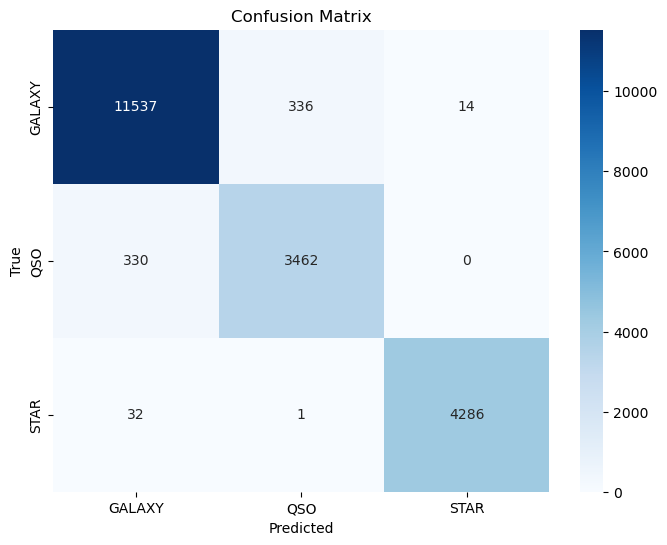

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [1]:
#FINDINGS:

#Accuracy: 96.43%, meaning the model correctly predicted the class in about 96.4% of cases.
#Class 0: High performance (Precision: 0.97, Recall: 0.97) with very few misclassifications.
#Class 1: Decent performance (Precision: 0.91, Recall: 0.91), but more misclassifications compared to other classes.
#Class 2: Excellent performance (Precision: 1.00, Recall: 0.99), with very few errors.
#Confusion Matrix: Class 2 is the best predicted, followed by Class 0. Class 1 has some false positives and false negatives.
#Conclusion:
#The model performs well across all classes, especially Class 2, with Class 1 showing the most room for improvement.

In [26]:
# California Housing Prices Part

In [27]:
import pandas as pd
house = pd.read_csv("housing.csv")
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [28]:
house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [29]:
median_ratio = (house["total_bedrooms"] / house["total_rooms"]).median()
house["total_bedrooms"].fillna(house["total_rooms"] * median_ratio, inplace=True)

In [30]:
house.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [31]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [32]:
house['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
house['ocean_proximity'] = le.fit_transform(house['ocean_proximity'])

In [34]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


In [35]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

num_bins = int(1 + np.log2(len(house)))  # Sturge’s Rule

house["median_house_value_bins"] = pd.cut(house["median_house_value"], bins=num_bins, labels=False)

# Stratified Split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(house, house["median_house_value_bins"] ):
    train_set = house.loc[train_idx].drop(columns=["median_house_value_bins"] )
    test_set = house.loc[test_idx].drop(columns=["median_house_value_bins"] )

In [36]:
from sklearn.model_selection import train_test_split
X_train = train_set.drop("median_house_value", axis=1)
y_train = train_set["median_house_value"]
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"]

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

# Predictions
ridge_preds = ridge_model.predict(X_test_scaled)
lasso_preds = lasso_model.predict(X_test_scaled)


ridge_mae = mean_absolute_error(y_test, ridge_preds)
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_rmse = np.sqrt(ridge_mse) 
ridge_r2 = r2_score(y_test, ridge_preds)


lasso_mae = mean_absolute_error(y_test, lasso_preds)
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_rmse = np.sqrt(lasso_mse) 
lasso_r2 = r2_score(y_test, lasso_preds)


print('''With Ridge:
MAE:''', ridge_mae,
''' MSE:''', ridge_mse,
''' RMSE:''', ridge_rmse,
''' R2:''', ridge_r2)

print('''With Lasso:
MAE:''', lasso_mae,
''' MSE:''', lasso_mse,
''' RMSE:''', lasso_rmse,
''' R2:''', lasso_r2)


With Ridge:
MAE: 50553.22563861209  MSE: 4835081463.695419  RMSE: 69534.75004409967  R2: 0.6362211806480034
With Lasso:
MAE: 50553.51333556865  MSE: 4835085537.075834  RMSE: 69534.77933434343  R2: 0.6362208741775687


In [ ]:
#FINDINGS:

# MAE (Mean Absolute Error):

# Ridge MAE: 50,553.23
# Lasso MAE: 50,553.51
# Interpretation: Both Ridge and Lasso models have very similar MAE values,
#indicating that on average, the predictions are off by about 50,553 units.
#This shows that both models are equally close to the actual values in terms of average error.

# MSE (Mean Squared Error):

# Ridge MSE: 4,835,081,463.70
# Lasso MSE: 4,835,085,537.08
# Interpretation: The MSE values are also very similar,
#with only a tiny difference between the two models. MSE is more sensitive to large errors, 
#but in this case, both models are performing similarly.

# RMSE (Root Mean Squared Error):

# Ridge RMSE: 69,534.75
# Lasso RMSE: 69,534.78
# Interpretation: Both models show an RMSE of around 69,535, 
#which indicates that, on average, the predictions are off by about 69,535 units.
#Again, the values are very close, so both models perform similarly in terms of this metric.

# R² (R-squared):

# Ridge R²: 0.6362
# Lasso R²: 0.6362
# Interpretation: Both models have an R² of 0.636, 
#meaning that around 63.6% of the variance in the target variable (house price, in this case) can be explained by the model.
#This is a moderate level of explanatory power, meaning the models are reasonably good at predicting the target but there is still a significant portion of the variance left unexplained
#Overall both models have similar performance here.
#However, Ridge tends to perform better when there is multicollinearity between features, 
#while Lasso can perform better when you want feature selection